In [74]:
# ========================================================
# 1. Import libraries
# ========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# ========================================================
# 2. Load dataset
# ========================================================
df = pd.read_csv("../data/owid-co2-data.csv")

print("✅ Dataset loaded")
print(f"Shape: {df.shape}")
df.head()

✅ Dataset loaded
Shape: (50191, 79)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# ========================================================
# 3. Explore dataset structure
# ========================================================

In [77]:
# View column names
df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_including_luc',
 'co2_including_luc_growth_abs',
 'co2_including_luc_growth_prct',
 'co2_including_luc_per_capita',
 'co2_including_luc_per_gdp',
 'co2_including_luc_per_unit_energy',
 'co2_per_capita',
 'co2_per_gdp',
 'co2_per_unit_energy',
 'coal_co2',
 'coal_co2_per_capita',
 'consumption_co2',
 'consumption_co2_per_capita',
 'consumption_co2_per_gdp',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_co2_including_luc',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_gas_co2',
 'cumulative_luc_co2',
 'cumulative_oil_co2',
 'cumulative_other_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'flaring_co2',
 'flaring_co2_per_capita',
 'gas_co2',
 'gas_co2_per_capita',
 'ghg_excluding_lucf_per_capita',
 'ghg_per_capita',
 'land_use_change_co2',
 'land_use_change_co2_per_capita',
 'methane',
 'methane_per_capita',
 

In [78]:
# View data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [79]:
# Summary statistics
df.describe(include='all')

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50191,50191.000000,42262,4.101900e+04,1.525100e+04,28863.000000,25358.000000,29137.000000,26981.000000,26002.000000,...,2108.000000,41001.000000,38060.000000,41001.000000,41001.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
unique,255,NaN,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,274,NaN,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1919.883067,NaN,5.686141e+07,3.300495e+11,7.767746,0.059036,415.698178,6.208882,43.104462,...,7.512655,2.269285,0.003026,0.007670,0.011023,0.000509,488.542225,316.133529,-7.232399,20.524440
std,NaN,65.627296,NaN,3.199905e+08,3.086383e+12,62.595292,0.120328,1945.843973,62.322553,1729.939596,...,17.671054,9.315325,0.016519,0.043694,0.061901,0.003043,2392.579910,1839.602293,250.640012,52.744956
min,NaN,1750.000000,NaN,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1977.750000,-100.000000,...,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2195.952000,-98.849000
25%,NaN,1875.000000,NaN,3.273130e+05,7.874038e+09,0.000000,0.000000,0.374000,-0.005000,-1.102500,...,0.204750,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-3.179500,-6.168000
50%,NaN,1924.000000,NaN,2.289522e+06,2.743861e+10,0.000000,0.001000,4.990000,0.044000,3.803500,...,0.838000,0.078000,0.000000,0.000000,0.000000,0.000000,15.007500,2.371000,1.518000,8.701000
75%,NaN,1974.000000,NaN,9.862459e+06,1.212627e+11,0.486000,0.075750,53.273000,1.002000,10.890750,...,3.211000,0.359000,0.001000,0.001000,0.001000,0.000000,78.242750,29.337500,9.153500,32.666000


In [80]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(20)

share_global_cumulative_other_co2      48083
share_global_other_co2                 48083
other_co2_per_capita                   47717
other_industry_co2                     46989
cumulative_other_co2                   46989
consumption_co2_per_gdp                45747
consumption_co2_per_capita             45689
trade_co2                              45656
trade_co2_share                        45656
consumption_co2                        45325
energy_per_gdp                         42495
co2_including_luc_per_unit_energy      40490
energy_per_capita                      40082
primary_energy_consumption             40040
co2_per_unit_energy                    39841
share_global_cumulative_flaring_co2    39322
share_global_flaring_co2               39322
flaring_co2_per_capita                 35497
share_global_cumulative_gas_co2        35157
share_global_gas_co2                   35157
dtype: int64

In [81]:
# ========================================================
# 4. Cleaning Data
# ========================================================

In [82]:
# --------------------------------------------
# Filter to keep only countries (not regions)
# --------------------------------------------
# Check unique values in 'country'
print(f"🌍 Unique country values: {df['country'].nunique()}")

# Keep only rows where 'iso_code' is not null (real countries have ISO codes)
df = df[df['iso_code'].notnull()].copy()

print(f"✅ Rows after filtering to countries: {df.shape}")

🌍 Unique country values: 255
✅ Rows after filtering to countries: (42262, 79)


In [83]:
# --------------------------------------------
# Keep data from 1990 onwards
# --------------------------------------------
df = df[df['year'] >= 1990].copy()

print(f"✅ Rows after year filter: {df.shape}")

✅ Rows after year filter: (7412, 79)


In [84]:
# --------------------------------------------
# Check for duplicate rows
# --------------------------------------------
duplicates = df.duplicated().sum()
print(f"🔁 Duplicate rows: {duplicates}")

# Drop duplicates if found
df = df.drop_duplicates()

🔁 Duplicate rows: 0


In [85]:
# --------------------------------------------
# Drop rows with missing CO2 or population
# --------------------------------------------
df = df[df['co2'].notnull() & df['population'].notnull()].copy()

print(f"✅ Rows after dropping null CO2/population: {df.shape}")

✅ Rows after dropping null CO2/population: (7229, 79)


In [86]:
# --------------------------------------------
# Negative values
# --------------------------------------------
negatives = df[(df['co2'] < 0) | (df['population'] < 0)]
print(f"⚠️ Rows with negative CO₂ or population: {len(negatives)}")

df = df[(df['co2'] >= 0) & (df['population'] >= 0)]

⚠️ Rows with negative CO₂ or population: 0


In [87]:
# Create emissions per 1,000 people
df['co2_per_1000'] = df['co2'] / (df['population'] / 1000)

In [88]:
# CO2 emissions per unit of GDP
df['co2_per_gdp'] = df['co2'] / df['gdp']

In [89]:
# Rounded year (for grouping if needed)
df['year'] = df['year'].astype(int)

In [90]:
print("✅ New features added")
df[['country', 'year', 'co2_per_1000', 'co2_per_gdp']].head()

✅ New features added


,country,year,co2_per_1000,co2_per_gdp
240,Afghanistan,1990,0.000168,1.549061e-10
241,Afghanistan,1991,0.000156,1.588730e-10
242,Afghanistan,1992,0.000112,1.168997e-10
243,Afghanistan,1993,0.000100,1.512011e-10
244,Afghanistan,1994,0.000089,1.835892e-10


In [91]:
# --------------------------------------------
# Save cleaned dataset
# --------------------------------------------
df.to_csv("../data/cleaned_co2.csv", index=False)
print("💾 Cleaned data saved to /data/cleaned_co2.csv")

💾 Cleaned data saved to /data/cleaned_co2.csv


In [92]:
# ========================================================
# 5. Summary Statistics
# ========================================================

In [93]:
# --------------------------------------------
# Basic statistics overview
# --------------------------------------------
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7229.0,2.006528e+03,9.798253e+00,1.990000e+03,1.998000e+03,2.007000e+03,2.015000e+03,2.023000e+03
population,7229.0,3.160799e+07,1.256570e+08,1.776000e+03,7.542300e+05,5.674118e+06,2.029449e+07,1.438070e+09
gdp,5409.0,4.894957e+11,1.704975e+12,2.571720e+08,1.886576e+10,6.111432e+10,2.913339e+11,2.696602e+13
cement_co2,6943.0,5.267813e+00,3.874770e+01,0.000000e+00,0.000000e+00,3.490000e-01,1.792500e+00,8.499760e+02
cement_co2_per_capita,6943.0,1.064936e-01,1.582196e-01,0.000000e+00,0.000000e+00,4.700000e-02,1.510000e-01,1.413000e+00
...,...,...,...,...,...,...,...,...
total_ghg,6653.0,2.348951e+02,8.738421e+02,5.000000e-03,9.159000e+00,4.589900e+01,1.235820e+02,1.396892e+04
total_ghg_excluding_lucf,6619.0,1.820186e+02,7.967889e+02,4.000000e-03,3.740000e+00,1.854000e+01,8.145450e+01,1.357942e+04
trade_co2,3939.0,4.045621e-02,1.061599e+02,-1.532080e+03,-1.083500e+00,1.796000e+00,8.793000e+00,6.541420e+02
trade_co2_share,3939.0,2.460561e+01,5.481773e+01,-9.884900e+01,-4.484000e+00,1.219700e+01,3.751600e+01,5.686350e+02


In [94]:
df['country'].value_counts().head(10)

country
Afghanistan              34
Saint Kitts and Nevis    34
New Zealand              34
Nicaragua                34
Niger                    34
Nigeria                  34
Niue                     34
North Korea              34
North Macedonia          34
Norway                   34
Name: count, dtype: int64

C:\Temp\ipykernel_10216\2181794690.py:12: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


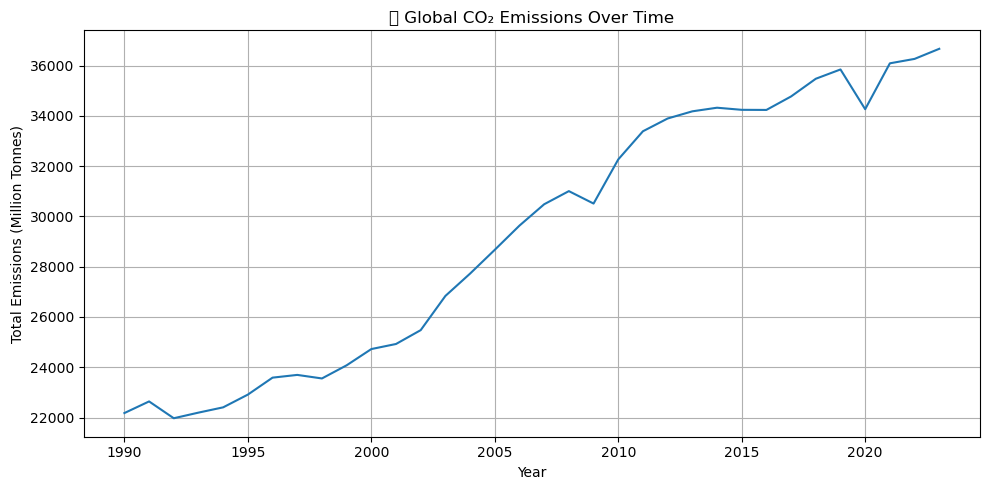

In [95]:
# --------------------------------------------
# Group and plot total CO2 emissions by year
# --------------------------------------------
global_trend = df.groupby('year')['co2'].sum()

plt.figure(figsize=(10, 5))
global_trend.plot()
plt.title("🌍 Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions (Million Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# --------------------------------------------
# Top Emitters in the Most Recent Year
# --------------------------------------------
latest_year = df['year'].max()

top_emitters = (
    df[df['year'] == latest_year]
    .sort_values('co2', ascending=False)
    .head(10)
)

top_emitters[['country', 'co2']]

,country,co2
9885,China,11902.503
47799,United States,4911.391
21658,India,3062.324
38157,Russia,1815.925
23732,Japan,988.785
22588,Iran,817.880
40120,Saudi Arabia,736.205
21832,Indonesia,733.224
18230,Germany,596.151
42855,South Korea,577.417


C:\Temp\ipykernel_10216\125431313.py:10: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


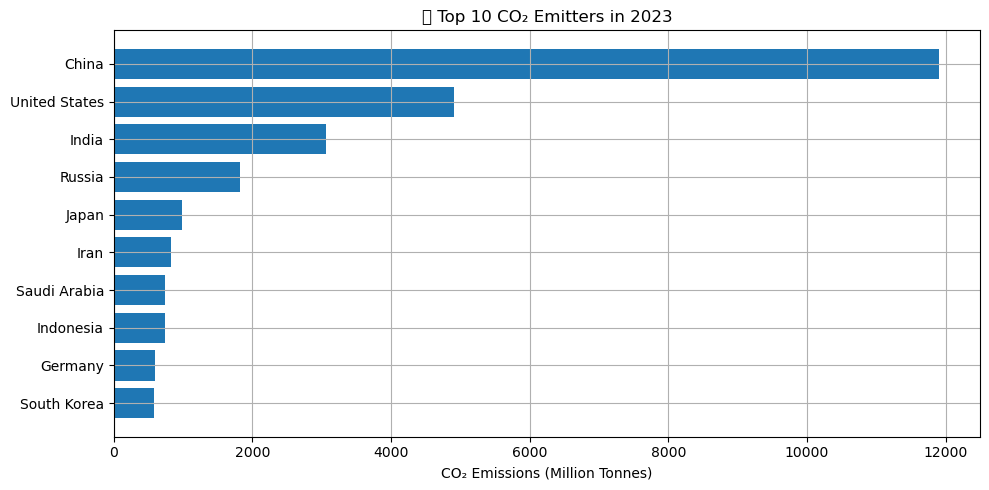

In [97]:
# --------------------------------------------
# Top Emitters in the Most Recent Year - Graphic
# --------------------------------------------
plt.figure(figsize=(10, 5))
plt.barh(top_emitters['country'], top_emitters['co2'])
plt.title(f"🔥 Top 10 CO₂ Emitters in {latest_year}")
plt.xlabel("CO₂ Emissions (Million Tonnes)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# --------------------------------------------
# Emissions Per Capita
# --------------------------------------------
top_per_capita = (
    df[df['year'] == latest_year]
    .sort_values('co2_per_capita', ascending=False)
    .head(10)
)

top_per_capita[['country', 'co2_per_capita']]

,country,co2_per_capita
37805,Qatar,38.841
7626,Brunei,25.644
4493,Bahrain,23.270
45601,Trinidad and Tobago,22.834
40120,Saudi Arabia,22.132
47301,United Arab Emirates,21.554
24779,Kuwait,20.508
32283,New Caledonia,17.482
41363,Sint Maarten (Dutch part),16.201
35741,Oman,15.549


C:\Temp\ipykernel_10216\701995982.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


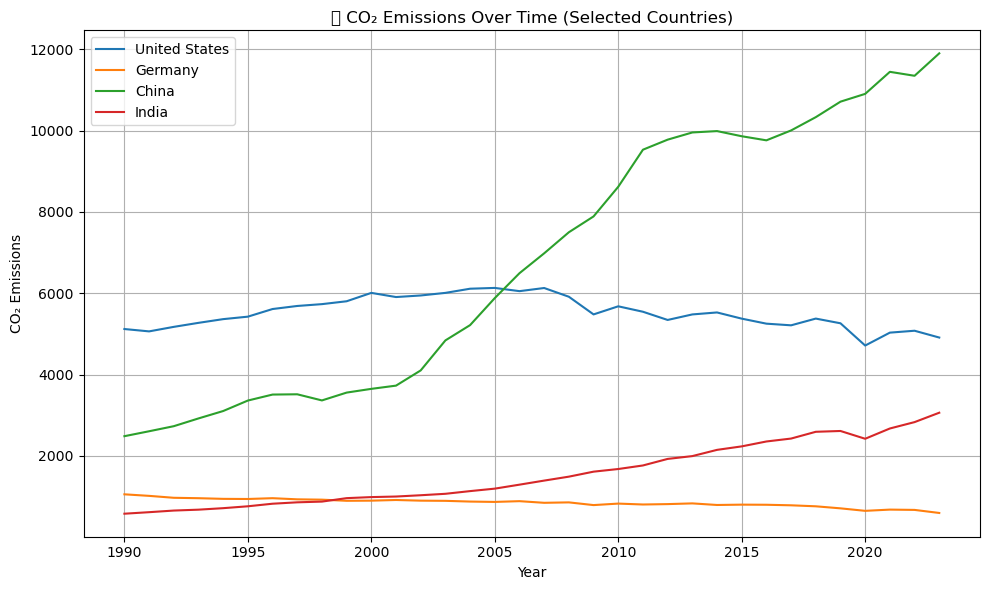

In [99]:
# --------------------------------------------
# Countries with Declining Emissions
# --------------------------------------------
countries_to_plot = ['United States', 'Germany', 'China', 'India']

plt.figure(figsize=(10, 6))
for c in countries_to_plot:
    subset = df[df['country'] == c]
    plt.plot(subset['year'], subset['co2'], label=c)

plt.title("📉 CO₂ Emissions Over Time (Selected Countries)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()